In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_palette("Set2")



In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

df["day"] = df["date_added"].dt.day
df["month"] = df["date_added"].dt.month
df["year"] = df["date_added"].dt.year

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25.0,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24.0,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24.0,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24.0,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24.0,9.0,2021.0


In [7]:
categorical_cols = ["director", "country", "cast", "rating", "duration"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

df[["day", "month", "year"]] = df[["day", "month", "year"]].fillna(0).astype(int)

df["date_added"] = df["date_added"].fillna(pd.Timestamp("2007-01-01"))

df.isna().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day             0
month           0
year            0
dtype: int64

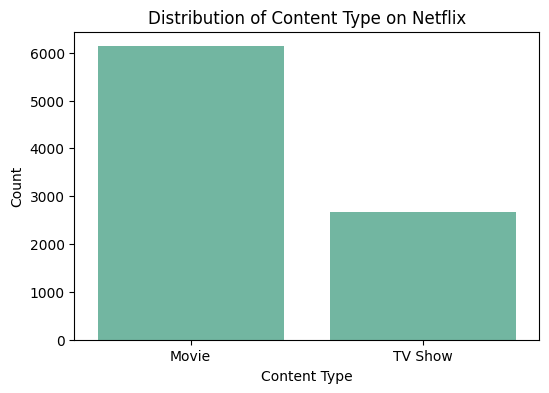

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


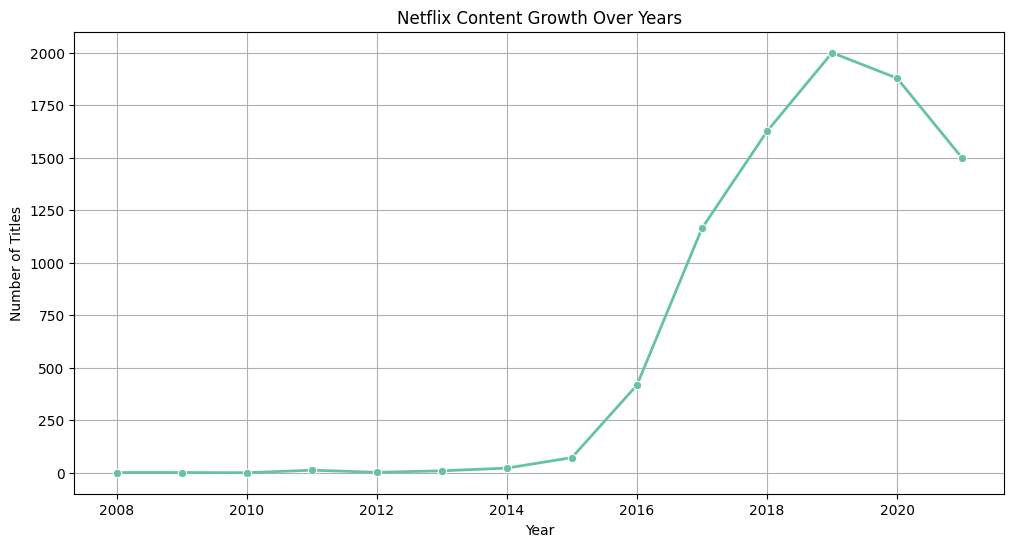

In [9]:
df_valid = df[df["year"] > 2005]
yearly = df_valid["year"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    x=yearly.index,
    y=yearly.values,
    marker="o",
    linewidth=2
)
plt.title("Netflix Content Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()



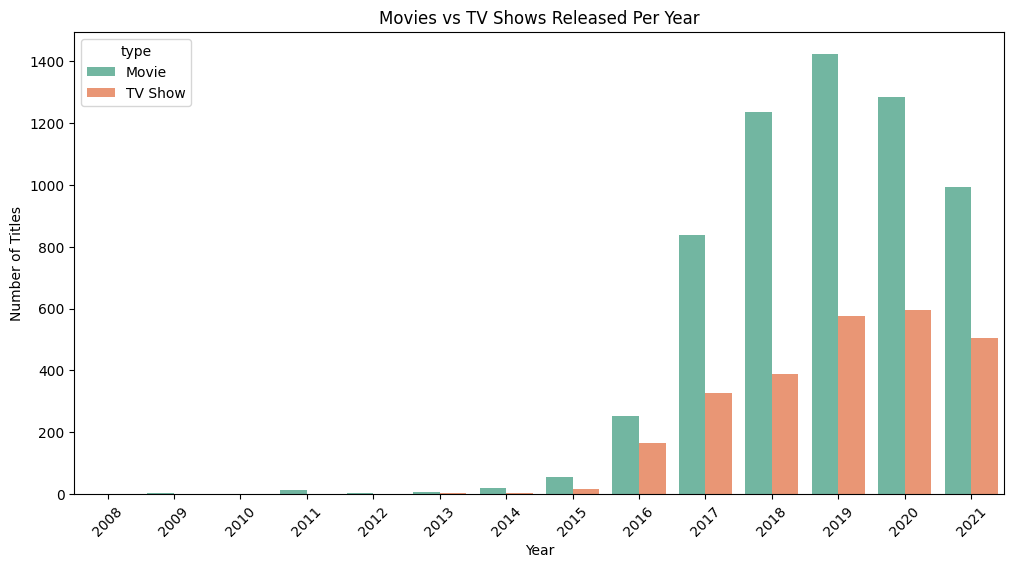

In [10]:
type_year = (
    df_valid
    .groupby(["year", "type"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=type_year,
    x="year",
    y="count",
    hue="type"
)
plt.xticks(rotation=45)
plt.title("Movies vs TV Shows Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()



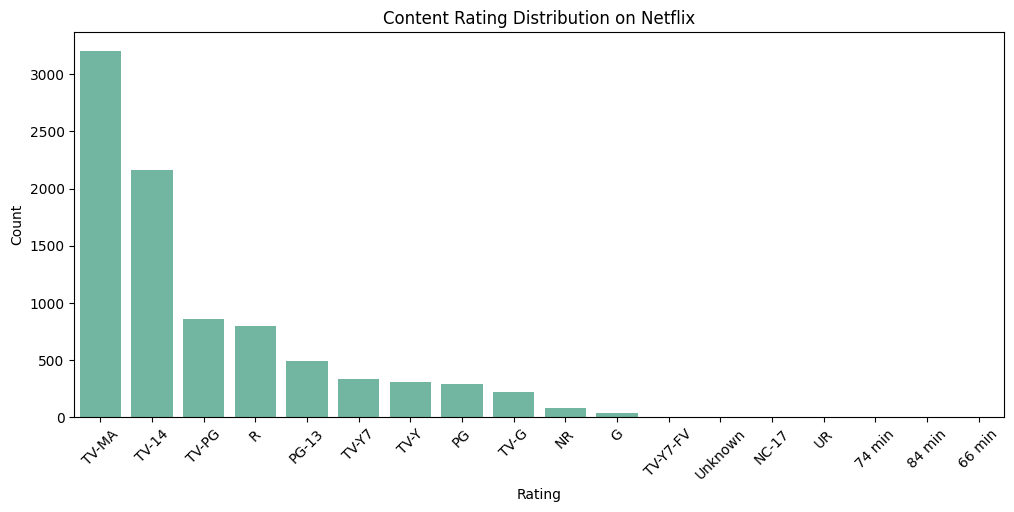

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="rating", order=df["rating"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Content Rating Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

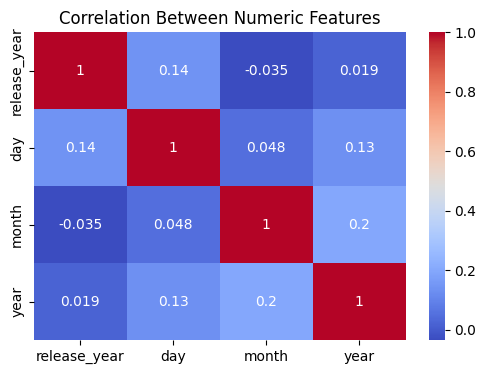

In [12]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()


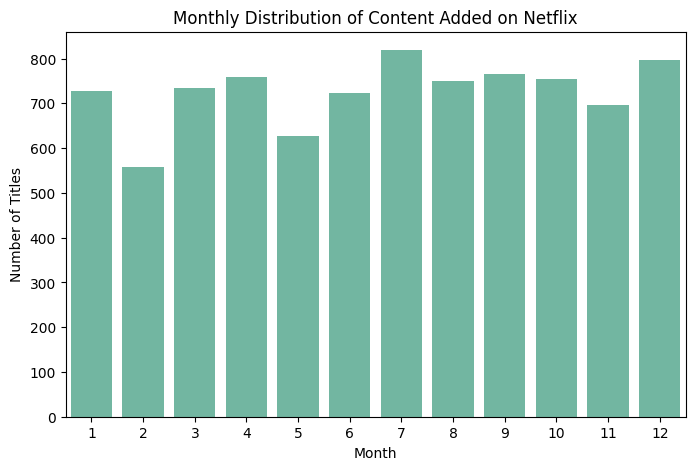

In [13]:
monthly = df_valid["month"].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly.index, y=monthly.values)
plt.title("Monthly Distribution of Content Added on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()


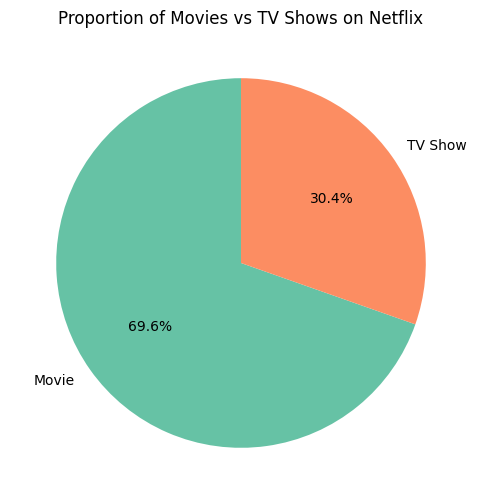

In [14]:
type_counts = df["type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    type_counts.values,
    labels=type_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Movies vs TV Shows on Netflix")
plt.show()
